In [1]:
#############################################################  SMS Spam Detection   ###################################################################

In [2]:
# process flow:
# Data Cleaning
# EDA
# Text Preprocessing
# Model building 
# Evaluation
# Improvement
# Website 
# Deployment

In [3]:
import numpy as np
import pandas as pd

In [4]:
sms_dataframe=pd.read_csv("spam.csv",encoding='ISO-8859-1')
sms_dataframe.reset_index(drop=True, inplace=True)

# sms_dataframe.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
sms_dataframe
# sms_dataframe.sample(5)

,Spam Or Ham,Received SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
10341,ham,"Well, i'm glad you didn't find it totally disa...",NaN,NaN,NaN
10342,ham,"Guy, no flash me now. If you go call me, call ...",NaN,NaN,NaN
10343,spam,Do you want a New Nokia 3510i colour phone Del...,NaN,NaN,NaN
10344,ham,Mark works tomorrow. He gets out at 5. His wor...,NaN,NaN,NaN


In [5]:
sms_dataframe.shape # (10346,5)

(10346, 5)

In [6]:
# Data Cleaning 
# drop/Remove last three columns as they are useless
# Data Cleaning 
# Drop/remove last three columns if they exist
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
columns_present = [col for col in columns_to_drop if col in sms_dataframe.columns]

if columns_present:
    sms_dataframe.drop(columns=columns_present, inplace=True)
    print(f"Dropped columns: {columns_present}")
else:
    print("Columns not found. They might have already been removed.")

# Print the dataframe to check if columns are dropped
print(sms_dataframe.head())

# If you want to rename the columns (uncomment the lines below)
# sms_dataframe.rename(columns={'v1':'Spam Or Ham', 'v2':'Received SMS'}, inplace=True)
# print(sms_dataframe.sample(5))

Dropped columns: ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
  Spam Or Ham                                       Received SMS
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
sms_dataframe.shape

(10346, 2)

In [8]:
# now lets assign numerical value to ham and spam
import sklearn
# print(sklearn.__version__)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
sms_dataframe['Spam Or Ham']=encoder.fit_transform(sms_dataframe['Spam Or Ham'])

In [10]:
sms_dataframe.sample(10)
# here 0 is assign to Ham and 1 is assign to Spam

,Spam Or Ham,Received SMS
449,0,10 min later k...
8853,0,Badrith is only for chennai:)i will surely pic...
3145,0,\SHIT BABE.. THASA BIT MESSED UP.YEH
3668,0,Yeah imma come over cause jay wants to do some...
4965,1,URGENT! We are trying to contact U. Todays dra...
8396,0,Then u ask darren go n pick u lor... But i oso...
1515,0,I wonder if you'll get this text?
3858,1,Win the newest Ã¥ÃHarry Potter and the Order ...
1156,0,Hey.. Something came up last min.. Think i wun...
7556,0,I wnt to buy a BMW car urgently..its vry urgen...


In [11]:
# lets check and remove duplicate values
sms_dataframe.duplicated().sum() # 403

4692

In [12]:
# sms_dataframe=sms_dataframe.drop_duplicates(keep='first')

In [13]:
sms_dataframe.shape

(10346, 2)

In [14]:
# EDA (Exploratory Data Analysis)

In [15]:
sms_dataframe.head()

,Spam Or Ham,Received SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
nums=sms_dataframe['Spam Or Ham'].value_counts()
print('Note: 0 is Ham 1 is Spam \n',nums)

Note: 0 is Ham 1 is Spam 
 Spam Or Ham
0    8949
1    1397
Name: count, dtype: int64


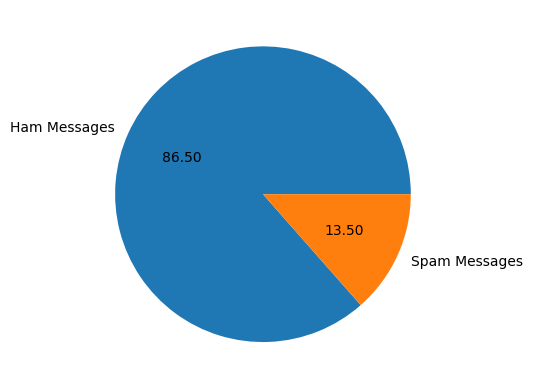

In [17]:
import matplotlib.pyplot as plt
plt.pie(sms_dataframe['Spam Or Ham'].value_counts(),labels=['Ham Messages',"Spam Messages"],autopct='%0.2F')
plt.show() # extra data will be hidden 

In [18]:
# data is imbalanced. i.e ham >> spam 

In [19]:
# Other analysis is to observe the nature of Ham and Spam sms . no of letter, words, sentences in two types of sms.
#we will create 3 new colums in sms_dataframe

In [20]:
# !pip install nltk , it is natural langauage toolkit . a NLP library

In [21]:
import nltk
nltk.download('punkt') # dependencies 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sudip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
sms_dataframe['Received SMS'] # Received SMS

0        Go until jurong point, crazy.. Available only ...
1                            Ok lar... Joking wif u oni...
2        Free entry in 2 a wkly comp to win FA Cup fina...
3        U dun say so early hor... U c already then say...
4        Nah I don't think he goes to usf, he lives aro...
                               ...                        
10341    Well, i'm glad you didn't find it totally disa...
10342    Guy, no flash me now. If you go call me, call ...
10343    Do you want a New Nokia 3510i colour phone Del...
10344    Mark works tomorrow. He gets out at 5. His wor...
10345    Keep ur problems in ur heart, b'coz nobody wil...
Name: Received SMS, Length: 10346, dtype: object

In [23]:
# sms_dataframe['Received SMS'].apply(len) # it gives no of characters in each sms 
# fetching total number of characters present in each sms 
# character_num=sms_dataframe['Received SMS'].apply(len) # into variable
sms_dataframe['no_of_characters_in_each_SMS']=sms_dataframe['Received SMS'].apply(len)
sms_dataframe

,Spam Or Ham,Received SMS,no_of_characters_in_each_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
10341,0,"Well, i'm glad you didn't find it totally disa...",62
10342,0,"Guy, no flash me now. If you go call me, call ...",74
10343,1,Do you want a New Nokia 3510i colour phone Del...,158
10344,0,Mark works tomorrow. He gets out at 5. His wor...,93


In [24]:
# fetching total number of words present in each sms
sms_dataframe['Received SMS'].apply(lambda x:(nltk.word_tokenize(x)))
# returns a list containing words in each SMS

0        [Go, until, jurong, point, ,, crazy, .., Avail...
1                 [Ok, lar, ..., Joking, wif, u, oni, ...]
2        [Free, entry, in, 2, a, wkly, comp, to, win, F...
3        [U, dun, say, so, early, hor, ..., U, c, alrea...
4        [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                               ...                        
10341    [Well, ,, i, 'm, glad, you, did, n't, find, it...
10342    [Guy, ,, no, flash, me, now, ., If, you, go, c...
10343    [Do, you, want, a, New, Nokia, 3510i, colour, ...
10344    [Mark, works, tomorrow, ., He, gets, out, at, ...
10345    [Keep, ur, problems, in, ur, heart, ,, b'coz, ...
Name: Received SMS, Length: 10346, dtype: object

In [25]:
sms_dataframe['Received SMS'].apply(lambda x:len((nltk.word_tokenize(x)))) # counting no of elements in each list
sms_dataframe['no_of_words_in_each_SMS']=sms_dataframe['Received SMS'].apply(lambda x:len((nltk.word_tokenize(x)))) # adding new column
sms_dataframe

,Spam Or Ham,Received SMS,no_of_characters_in_each_SMS,no_of_words_in_each_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
10341,0,"Well, i'm glad you didn't find it totally disa...",62,14
10342,0,"Guy, no flash me now. If you go call me, call ...",74,23
10343,1,Do you want a New Nokia 3510i colour phone Del...,158,30
10344,0,Mark works tomorrow. He gets out at 5. His wor...,93,23


In [26]:
sms_dataframe.loc[:, 'no_of_sentences_in_each_SMS'] = sms_dataframe['Received SMS'].apply(lambda x: len(nltk.sent_tokenize(x))) # adding new column in df
sms_dataframe.head()

,Spam Or Ham,Received SMS,no_of_characters_in_each_SMS,no_of_words_in_each_SMS,no_of_sentences_in_each_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
# now lets analyse three newly added columns
sms_dataframe[['no_of_characters_in_each_SMS','no_of_words_in_each_SMS','no_of_sentences_in_each_SMS']].describe()

,no_of_characters_in_each_SMS,no_of_words_in_each_SMS,no_of_sentences_in_each_SMS
count,10346.000000,10346.000000,10346.000000
mean,86.308718,20.108448,2.096559
std,409.892977,94.776256,6.848146
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,62.000000,15.000000,2.000000
75%,123.000000,27.000000,2.000000
max,32819.000000,7617.000000,559.000000


In [28]:
sms_dataframe

,Spam Or Ham,Received SMS,no_of_characters_in_each_SMS,no_of_words_in_each_SMS,no_of_sentences_in_each_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
10341,0,"Well, i'm glad you didn't find it totally disa...",62,14,1
10342,0,"Guy, no flash me now. If you go call me, call ...",74,23,4
10343,1,Do you want a New Nokia 3510i colour phone Del...,158,30,2
10344,0,Mark works tomorrow. He gets out at 5. His wor...,93,23,3


In [29]:
# for Ham SMS 
sms_dataframe[sms_dataframe['Spam Or Ham'] == 0 ] [['no_of_characters_in_each_SMS','no_of_words_in_each_SMS','no_of_sentences_in_each_SMS']].describe()

,no_of_characters_in_each_SMS,no_of_words_in_each_SMS,no_of_sentences_in_each_SMS
count,8949.000000,8949.000000,8949.000000
mean,78.023131,18.882780,1.950721
std,440.000004,101.815641,7.327218
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,22.000000,2.000000
max,32819.000000,7617.000000,559.000000


In [30]:
# for Spam SMS 
sms_dataframe[sms_dataframe['Spam Or Ham'] == 1 ] [['no_of_characters_in_each_SMS','no_of_words_in_each_SMS','no_of_sentences_in_each_SMS']].describe()


,no_of_characters_in_each_SMS,no_of_words_in_each_SMS,no_of_sentences_in_each_SMS
count,1397.000000,1397.000000,1397.000000
mean,139.385111,27.959914,3.030780
std,29.368653,6.877549,1.546712
min,13.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,150.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


In [31]:
# from above two tables,mean of no of words in each SMS for ham is 17.12  and for spam is 27.66. simple insights:spam are usually long messages than ham